# Data Analytics Programming Assignment 2 - NYC Restaurants

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<b>[Q1] Create a unique name for each restaurant.</b> Print the first 10 values of the RESTAURANT column of your DataFrame.

In [2]:
# read in the csv file as df
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)

# make the new column
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] 

# print the first 10 restaurants
print df['RESTAURANT'][:10] 

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


<b>[Q2] How many restaurants are included in the data?</b>

In [3]:
# get rid of duplicate violations
unique_restaurants = df.drop_duplicates(subset='RESTAURANT')

# get the number of unique restaurants
len(unique_restaurants)

10114

So there are 10,114 restaurants in the data.

<b>[Q3] How many chains are there?</b>

In [4]:
# create a mask that will show the restaurants that appear more than once
if_chain = unique_restaurants.duplicated(subset='DBA', keep=False)

# apply the mask to the data frame
chains = unique_restaurants[if_chain]

# this will get a series with the number of restaurants for each chain
chains_count = chains['DBA'].value_counts()

# get the number of chains
len(chains_count)

368

There are 368 chain restaurants.

<b>[Q4] Plot a bar graph of the top 20 most popular chains.</b>

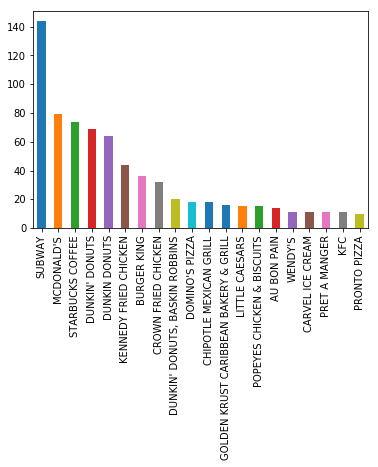

In [5]:
# use chains_count for this plot
top_20_chains = chains_count[:20] # get the top 20
top_20_chains.plot(kind='bar')

<b>[Q5] What fraction of all restaurants are chains?</b>

In [6]:
# get the total number of chain restaurants
total_chains = sum(if_chain)

# get the total number of restaurants
total_rest = float(len(unique_restaurants))

# get the fraction of all restaurants that are chains
frac_chains = total_chains / total_rest
frac_chains

0.16472216729286138

16.47% of all restaurants are chains.

<b>[Q6] Plot the number of non-chain restaurants in each
boro.</b>

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


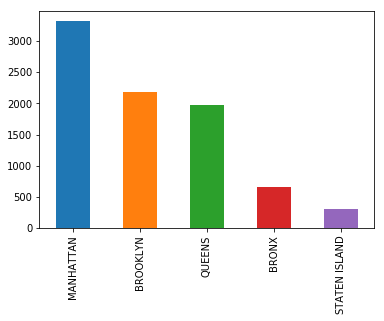

In [7]:
# get the non-chain restaurants
not_chains = unique_restaurants.drop_duplicates(subset='DBA', keep=False)

# apply a mask to get rid of missing values in BORO
mask = (not_chains['BORO'] == 'Missing')
not_chains.loc[mask, 'BORO'] = np.nan

# plot the non-chain restaurants in each boro
by_boro = not_chains['BORO'].value_counts()
by_boro.plot(kind='bar')

<b>[Q7] Plot the fraction of non-chain restaurants in each
boro.</b>

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


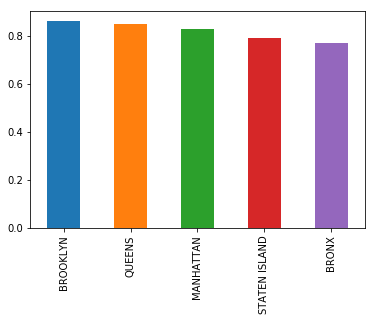

In [8]:
# apply a mask to get rid of missing values 
mask = (unique_restaurants['BORO'] == 'Missing')
unique_restaurants.loc[mask, 'BORO'] = np.nan

# get the total restaurants in each boro
total_by_boro = unique_restaurants['BORO'].value_counts()

# get the fractions of non-chain restaurants, and plot 
non_chain_frac = by_boro / total_by_boro
non_chain_frac.sort_values(ascending=False).plot(kind='bar')

The boro with the most independent restaurants is Manhattan, while the boro with the highest ratio of independent restaurants is Brooklyn, so these do not match up.

<b>[Q8] Plot the popularity of cuisines.</b>

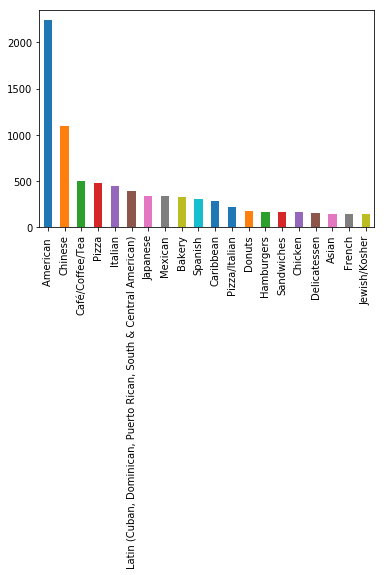

In [9]:
# get the number of restaurants for each cuisine
cuisines = unique_restaurants['CUISINE DESCRIPTION'].value_counts()

# plot the top 20 most popular
top_cuisines = cuisines[:20]
top_cuisines.plot(kind='bar')

<b>[Q9] Plot the cuisines among restaurants which never got
cited for violations.</b> 

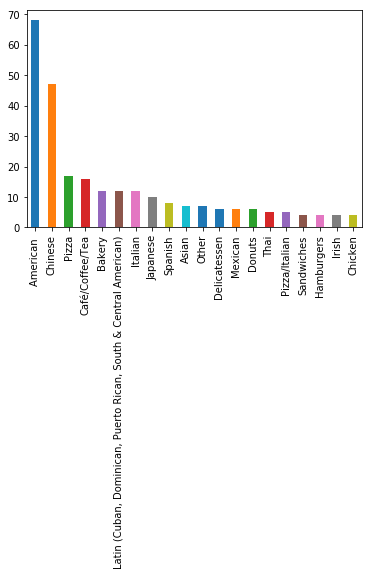

In [10]:
# get the "clean" restaurants by cuisine, which have no violation codes associated
mask = (unique_restaurants['VIOLATION CODE'].isna())
clean = unique_restaurants.loc[mask, 'CUISINE DESCRIPTION'].value_counts()

# plot the top 20 "clean" cuisines
top_clean = clean[:20]
top_clean.plot(kind='bar')

<b>[Q10] What cuisines tend to be the “cleanest”?</b>

In [11]:
# from the cuisines, select those with at least 20 restaurants representing
mask = (cuisines >= 20)
pop_cuisines = cuisines[mask]

# get the ratio of clean restaurants
clean_ratio = clean / pop_cuisines
cleanest = clean_ratio.dropna().sort_values(ascending=False)

# get the top 10 highest ratios
top10_cleanest = cleanest[:10]
top10_cleanest

Vietnamese/Cambodian/Malaysia    0.093750
Soul Food                        0.090909
Other                            0.067961
Irish                            0.057143
Asian                            0.047945
Soups & Sandwiches               0.047619
Barbecue                         0.047619
Continental                      0.047619
Chinese                          0.042805
Delicatessen                     0.039216
Name: CUISINE DESCRIPTION, dtype: float64

<b>[Q11] What are the most common violations in each borough?</b>

In [12]:
# must do the mask again for the original data frame
mask = (df['BORO'] == 'Missing')
df.loc[mask, 'BORO'] = np.nan

# make the crosstab of violations by boro
viols_by_boro = pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO'])

# get the most common violation for each boro
viols_by_boro.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

It's all the same violation

<b>[Q12] What are the most common violations per borough,
after normalizing for the relative abundance of each violation?</b>

In [13]:
# get the total frequency of each violation
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()
violationFrequency

# function to normalize the violations
def normalized(v):
    """This function takes a value and divides by the violationFrequency"""
    return v / violationFrequency

# apply the function for the whole data frame
normalized_viols = viols_by_boro.apply(normalized)

# get the most common normalized violations for each boro
normalized_viols.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

<b>[Q13] How many phone area codes correspond to a single
zipcode?</b>

In [14]:
def area_code(p):
    """This function extracts the area code given a phone number"""
    return p[:3]

# new data frame with unique phone numbers and their zipcodes
zip_df = df[['ZIPCODE', 'PHONE']].drop_duplicates(subset=['PHONE'])

# create a new column with all the area codes
zip_df['AREA'] = zip_df['PHONE'].map(area_code)

# group by to get unique pairs of zip and area code
new_df = zip_df.groupby(['ZIPCODE','AREA']).size().reset_index().rename(columns={0:'count'})

# get the number of area codes that only correspond to one zipcode
sum(new_df['count'].value_counts() == 1)

34

There are 34 area codes that only correspond to one zipcode

<b>[Q14] Find common misspellings of street names</b>

In [15]:
def get_last(s):
    """Return the last word in a string"""
    return s.split()[-1]

# create the street type column
df['STREET TYPE'] = df['STREET'].map(get_last)

def all_but_last(s):
    """Return all but the last word in a string"""
    return s.rsplit(' ', 1)[0]

# create the street base column
df['STREET BASE'] = df['STREET'].map(all_but_last)

# create the street base & zip column
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']

# make a new data frame with just these three columns
new_df = df[['STREET TYPE', 'STREET BASE', 'STREET BASE & ZIP']].copy() \
                                                                     .drop_duplicates() \
                                                                     .dropna(subset=['STREET BASE'])

# merge the data frame on itself based on street base & zip
merged = new_df.merge(new_df, left_on='STREET BASE & ZIP', right_on='STREET BASE & ZIP')

# find the rows where the street types are different 
mask = (merged['STREET TYPE_x'] != merged['STREET TYPE_y'])
different = merged[mask]

# make the crosstabulation table of the distinct street types
cross = pd.crosstab(different['STREET TYPE_x'], different['STREET TYPE_y'])

# get the most common street types occurring for each spelling
mostcommon_types = cross.idxmax()
print mostcommon_types['AVE']
print mostcommon_types['ST']
print mostcommon_types['RD']
print mostcommon_types['PL']
print mostcommon_types['BOULEARD']
print mostcommon_types['BOULEVARD']

AVENUE
STREET
ROAD
PLACE
BLVD
BLVD


So the most common for AVE is AVENUE, ST is STREET, RD is ROAD, PL is PLACE, BOULEARD is BLVD, and BULEVARD is BLVD